In [1]:
pip install pyspark

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install findspark


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [48]:
import findspark
from pyspark import SparkContext
from pyspark.sql import SparkSession, Window, Row
from pyspark.sql.functions import *
from pyspark.sql.types import *
import matplotlib.pyplot as plt

In [49]:
import pandas as pd

<h1>creating aspark session

In [50]:
spark = SparkSession \
        .builder \
        .appName("adiSpark") \
        .getOrCreate()

<h1>loading the data

In [51]:
df1=spark.read.csv('Crimes_-_2001_to_Present.csv',inferSchema=True,header=True)

In [52]:
df1.limit(5).show()

+--------+-----------+--------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|                Date|               Block|IUCR|        Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+--------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
| 5741943|   HN549294|08/25/2007 09:22:...|  074XX N ROGERS AVE|0560|             ASSAULT|              SIMPLE|             

<h1>1schema display

In [53]:
df1.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- Case Number: string (nullable = true)
 |-- Date: string (nullable = true)
 |-- Block: string (nullable = true)
 |-- IUCR: string (nullable = true)
 |-- Primary Type: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Location Description: string (nullable = true)
 |-- Arrest: boolean (nullable = true)
 |-- Domestic: boolean (nullable = true)
 |-- Beat: integer (nullable = true)
 |-- District: integer (nullable = true)
 |-- Ward: integer (nullable = true)
 |-- Community Area: integer (nullable = true)
 |-- FBI Code: string (nullable = true)
 |-- X Coordinate: integer (nullable = true)
 |-- Y Coordinate: integer (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Updated On: string (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Longitude: double (nullable = true)
 |-- Location: string (nullable = true)



<h1>Finding the number of null values in columns of dataframe

In [54]:



for x in df1.columns:
    c=df1.filter(col(x).isNull()).count()
    if c>0:
        print(x," : ",c)
        c=0

Location Description  :  11937
District  :  47
Ward  :  614849
Community Area  :  613476
X Coordinate  :  90138
Y Coordinate  :  90138
Latitude  :  90138
Longitude  :  90138
Location  :  90138


<h1>dataframe after dropping the null values

In [55]:
noNulldf=df1.dropna('any')
noNulldf.count()

7214526

In [56]:
noNulldf.show()

+--------+-----------+--------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|                Date|               Block|IUCR|        Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+--------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|13210088|   JG423627|08/31/2023 12:00:...|023XX W JACKSON BLVD|1153|  DECEPTIVE PRACTICE|FINANCIAL IDENTIT...|             

<h1> Changing the datatype of Date 

In [57]:
dff=noNulldf.withColumn("Date", to_date(col("Date"), "MM/dd/yyyy hh:mm:ss a"))

display(dff)

DataFrame[ID: int, Case Number: string, Date: date, Block: string, IUCR: string, Primary Type: string, Description: string, Location Description: string, Arrest: boolean, Domestic: boolean, Beat: int, District: int, Ward: int, Community Area: int, FBI Code: string, X Coordinate: int, Y Coordinate: int, Year: int, Updated On: string, Latitude: double, Longitude: double, Location: string]

In [58]:
dff.show()

+--------+-----------+----------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|      Date|               Block|IUCR|        Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+----------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|13210088|   JG423627|2023-08-31|023XX W JACKSON BLVD|1153|  DECEPTIVE PRACTICE|FINANCIAL IDENTIT...|              STREET| false|   false|1225|      12|  

<h1> filtering last 10 years data of crime

In [59]:
df2=dff.filter('Year>=2013')

In [60]:
df2.count()

2734339

<h1>finding all the types of crime

In [61]:
z=df2.select("Primary Type").distinct()
z.show(100)

+--------------------+
|        Primary Type|
+--------------------+
|OFFENSE INVOLVING...|
|CRIMINAL SEXUAL A...|
|            STALKING|
|PUBLIC PEACE VIOL...|
|           OBSCENITY|
|               ARSON|
|            GAMBLING|
|   CRIMINAL TRESPASS|
|             ASSAULT|
|LIQUOR LAW VIOLATION|
| MOTOR VEHICLE THEFT|
|               THEFT|
|             BATTERY|
|             ROBBERY|
|            HOMICIDE|
|   HUMAN TRAFFICKING|
|        INTIMIDATION|
|        PROSTITUTION|
|  DECEPTIVE PRACTICE|
|CONCEALED CARRY L...|
|         SEX OFFENSE|
|     CRIMINAL DAMAGE|
|           NARCOTICS|
|       OTHER OFFENSE|
|          KIDNAPPING|
|            BURGLARY|
|   WEAPONS VIOLATION|
|INTERFERENCE WITH...|
| CRIM SEXUAL ASSAULT|
|NON-CRIMINAL (SUB...|
|      NON - CRIMINAL|
|    PUBLIC INDECENCY|
|        NON-CRIMINAL|
|OTHER NARCOTIC VI...|
|           RITUALISM|
+--------------------+



<h1> removing thenon essential primary type names

In [62]:
y = ['NON-CRIMINAL (SUBJECT SPECIFIED)', 'OTHER OFFENSE', 'STALKING', 'NON-CRIMINAL', 'ARSON']

# Remove records with specified crime types
df3 = df2.filter(~col("Primary Type").isin(y))

# Show the first few rows of the filtered DataFrame
df3.show()

+--------+-----------+----------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|      Date|               Block|IUCR|        Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+----------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|13210088|   JG423627|2023-08-31|023XX W JACKSON BLVD|1153|  DECEPTIVE PRACTICE|FINANCIAL IDENTIT...|              STREET| false|   false|1225|      12|  

In [63]:
df3.count()

2554442

In [64]:

z=df3.select("Primary Type").distinct()
z.show(50)


+--------------------+
|        Primary Type|
+--------------------+
|OFFENSE INVOLVING...|
|CRIMINAL SEXUAL A...|
|PUBLIC PEACE VIOL...|
|           OBSCENITY|
|            GAMBLING|
|   CRIMINAL TRESPASS|
|             ASSAULT|
|LIQUOR LAW VIOLATION|
| MOTOR VEHICLE THEFT|
|               THEFT|
|             BATTERY|
|             ROBBERY|
|            HOMICIDE|
|   HUMAN TRAFFICKING|
|        INTIMIDATION|
|        PROSTITUTION|
|  DECEPTIVE PRACTICE|
|CONCEALED CARRY L...|
|         SEX OFFENSE|
|     CRIMINAL DAMAGE|
|           NARCOTICS|
|          KIDNAPPING|
|            BURGLARY|
|   WEAPONS VIOLATION|
|INTERFERENCE WITH...|
| CRIM SEXUAL ASSAULT|
|      NON - CRIMINAL|
|    PUBLIC INDECENCY|
|OTHER NARCOTIC VI...|
|           RITUALISM|
+--------------------+



<h1>Merging the similar types of dataframes

In [65]:
df4=df3.withColumn("Primary Type", 
                when(col("Primary Type").isin('SEX OFFENSE', 'PROSTITUTION','CRIMINAL SEXUAL ASSAULT'), "SEX OFFENSE/PROSTITUTION")
                .otherwise(col("Primary Type")))
df5=df4.withColumn("Primary Type", 
                when(col("Primary Type").isin('MOTOR VEHICLE THEFT', 'THEFT','ROBBERY'), "THEFT")
                .otherwise(col("Primary Type")))
df6=df5.withColumn("Primary Type", 
                when(col("Primary Type").isin('ASSAULT', 'BATTERY','HOMICIDE'), "ASSAULT")
                .otherwise(col("Primary Type")))
df7=df6.withColumn("Primary Type", 
                when(col("Primary Type").isin( 'PUBLIC INDECENCY', 'PUBLIC PEACE VIOLATION'), "public ")
                .otherwise(col("Primary Type")))
df7.show()

+--------+-----------+----------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|      Date|               Block|IUCR|        Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+----------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|13210088|   JG423627|2023-08-31|023XX W JACKSON BLVD|1153|  DECEPTIVE PRACTICE|FINANCIAL IDENTIT...|              STREET| false|   false|1225|      12|  

In [66]:

final_primarytype=df7.select("Primary Type").distinct()
final_primarytype.show(50)


+--------------------+
|        Primary Type|
+--------------------+
|OFFENSE INVOLVING...|
|           OBSCENITY|
|            GAMBLING|
|   CRIMINAL TRESPASS|
|             ASSAULT|
|LIQUOR LAW VIOLATION|
|               THEFT|
|SEX OFFENSE/PROST...|
|   HUMAN TRAFFICKING|
|        INTIMIDATION|
|  DECEPTIVE PRACTICE|
|CONCEALED CARRY L...|
|             public |
|     CRIMINAL DAMAGE|
|           NARCOTICS|
|          KIDNAPPING|
|            BURGLARY|
|   WEAPONS VIOLATION|
|INTERFERENCE WITH...|
| CRIM SEXUAL ASSAULT|
|      NON - CRIMINAL|
|OTHER NARCOTIC VI...|
|           RITUALISM|
+--------------------+



<h1>Analysing the data and preseent the results

In [67]:
list=[data[0] for data in final_primarytype.select('Primary Type').collect()]
list

['OFFENSE INVOLVING CHILDREN',
 'OBSCENITY',
 'GAMBLING',
 'CRIMINAL TRESPASS',
 'ASSAULT',
 'LIQUOR LAW VIOLATION',
 'THEFT',
 'SEX OFFENSE/PROSTITUTION',
 'HUMAN TRAFFICKING',
 'INTIMIDATION',
 'DECEPTIVE PRACTICE',
 'CONCEALED CARRY LICENSE VIOLATION',
 'public ',
 'CRIMINAL DAMAGE',
 'NARCOTICS',
 'KIDNAPPING',
 'BURGLARY',
 'WEAPONS VIOLATION',
 'INTERFERENCE WITH PUBLIC OFFICER',
 'CRIM SEXUAL ASSAULT',
 'NON - CRIMINAL',
 'OTHER NARCOTIC VIOLATION',
 'RITUALISM']


<h1>find the yearwise trend of crime over the years


In [82]:
import operator as op
sum1=[]
for i in range(2013,2024):
    u=str(i)
    l2=[]
    #sum1=[]
    print(u)
    x=df7.filter(col('Year')==u)
    l1=[data[0] for data in x.select('Primary Type').collect()]
    for j in list:
        a=op.countOf(l1,j)
        l2.append(a)
    print(l2)
    sum_values = 0
    for num in l2:
        sum_values =sum_values+num
    max_value = l2[0]  


    for num in l2:
        if num > max_value:
            max_value = num

    print(max_value)
    
    sum1.append(sum_values)
    max_index = l2.index(max_value)
    print(max_index)
    v=list[max_index]
    print("trending crime in",i,'is ',v)
    print(sum_values)
        

2013
[2315, 25, 596, 8135, 72389, 465, 95846, 2698, 1, 134, 13243, 0, 3145, 30848, 34106, 242, 17886, 3245, 1281, 1213, 3, 5, 0]
95846
6
trending crime in 2013 is  THEFT
287821
2014
[2307, 36, 393, 7536, 66729, 395, 81033, 2577, 2, 115, 14855, 15, 2911, 27776, 28906, 220, 14559, 3109, 1398, 1226, 10, 10, 0]
81033
6
trending crime in 2014 is  THEFT
256118
2015
[2074, 42, 310, 6390, 66311, 291, 76330, 2247, 13, 116, 13945, 34, 2428, 28587, 21607, 189, 13101, 3333, 1307, 1217, 20, 5, 0]
76330
6
trending crime in 2015 is  THEFT
239897
2016
[2302, 51, 189, 6295, 69755, 227, 84254, 1823, 11, 135, 17374, 35, 1610, 30931, 13257, 202, 14278, 3449, 934, 1425, 5, 4, 0]
84254
6
trending crime in 2016 is  THEFT
248546
2017
[2172, 79, 191, 6798, 69063, 191, 86790, 1797, 6, 149, 16966, 69, 1506, 28955, 11475, 190, 12946, 4682, 1083, 1405, 0, 11, 0]
86790
6
trending crime in 2017 is  THEFT
246524
2018
[2191, 84, 201, 6881, 70655, 265, 83634, 2080, 12, 167, 17220, 148, 1378, 27698, 12796, 171, 11681, 5

In [83]:
data0={
    'year':[2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023],
    'count':sum1
}
df = pd.DataFrame(data0)
df

,year,count
0,2013,287821
1,2014,256118
2,2015,239897
3,2016,248546
4,2017,246524
5,2018,245342
6,2019,240846
7,2020,193863
8,2021,187548
9,2022,217399


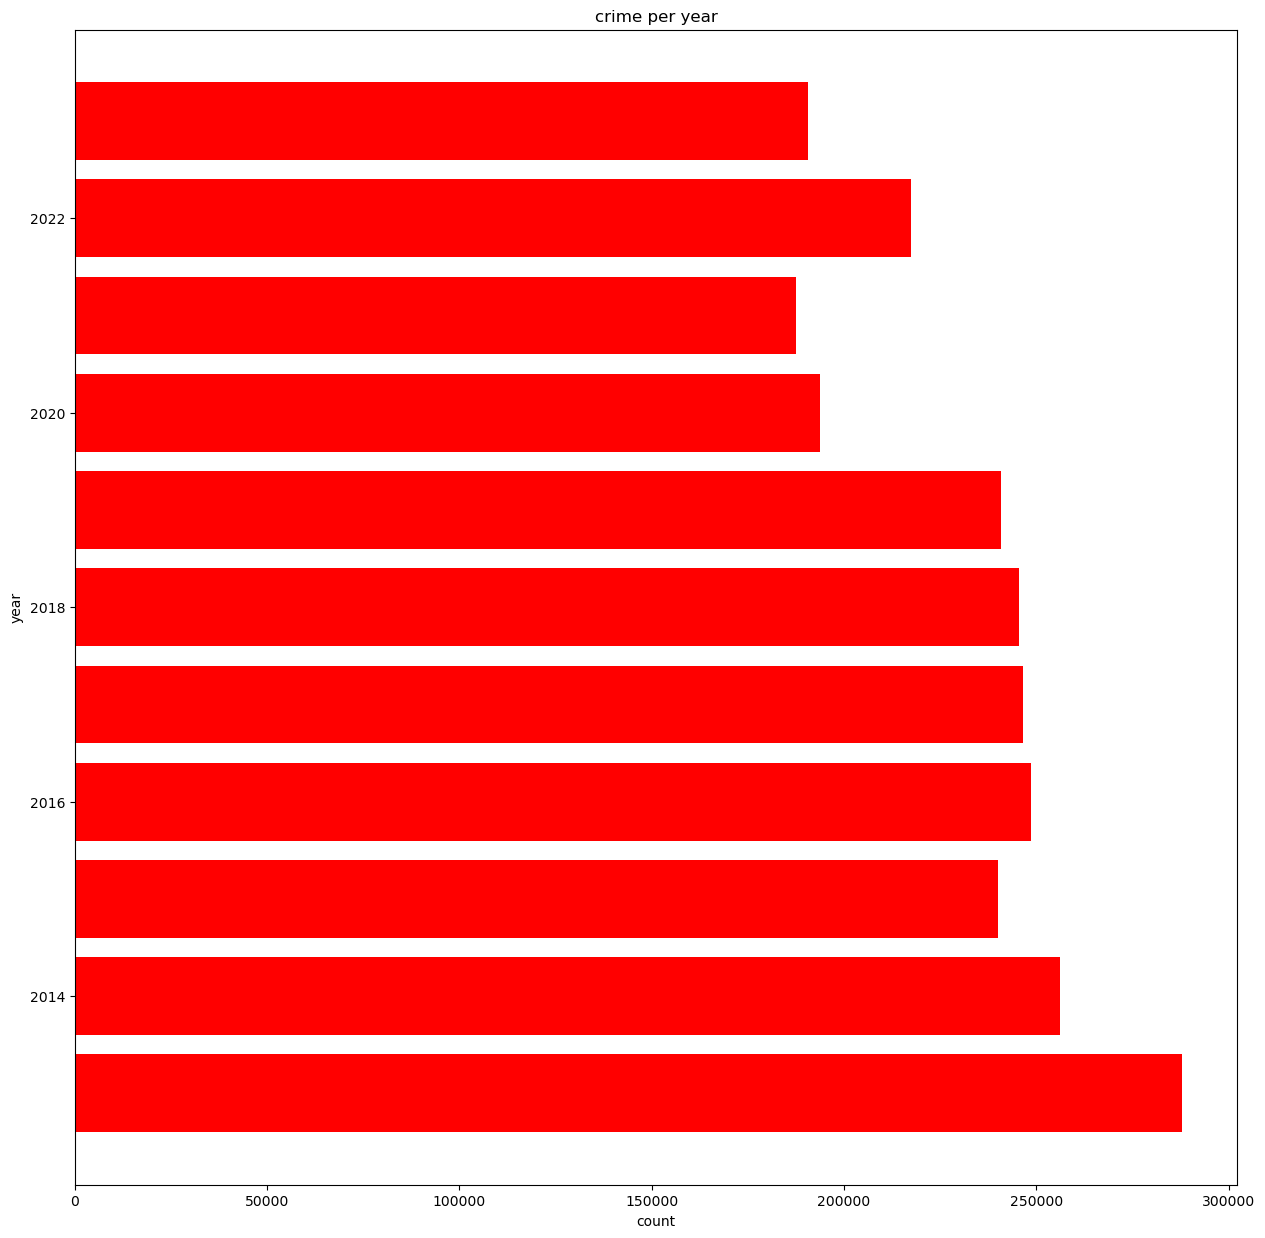

In [84]:
plt.figure(figsize=(15, 15))
plt.barh(df['year'], df['count'], color='red')
plt.xlabel('count')
plt.ylabel('year')
plt.title('crime per year')
          
plt.show()

In [71]:
list3=noNulldf.select("Date")
list3.show()

+--------------------+
|                Date|
+--------------------+
|08/31/2023 12:00:...|
|07/24/2023 09:45:...|
|08/27/2023 07:00:...|
|09/04/2023 09:30:...|
|08/15/2023 02:20:...|
|07/24/2023 04:09:...|
|09/03/2023 10:27:...|
|08/17/2023 07:00:...|
|08/24/2023 02:27:...|
|08/11/2023 11:00:...|
|04/21/2019 12:30:...|
|10/30/2020 04:30:...|
|04/17/2021 03:20:...|
|01/11/2022 03:00:...|
|01/14/2022 03:55:...|
|01/13/2022 04:00:...|
|08/05/2022 09:00:...|
|08/14/2022 02:00:...|
|11/10/2022 03:47:...|
|08/17/2019 01:14:...|
+--------------------+
only showing top 20 rows



In [75]:
hrs = df7.groupBy(hour(df7["Date"]).alias("Hour")).count().orderBy("count", ascending=False)
high_hr = hrs.first()
if high_hr==0:
    high_hr=12
print(high_hr)

Row(Hour=0, count=2554442)


<h1> At 12 am has highest crime records in chicago

Bar grapgh plot of top ten crimes

In [76]:
k=[data[0] for data in df7.select('Primary Type').collect()]
l3=[]
for j in list:
    a=op.countOf(k,j)
    l3.append(a)
print(l3)
print(list)    
    
   

[22491, 542, 2081, 64247, 722572, 2732, 860875, 26041, 91, 1625, 167670, 1174, 17772, 301458, 156410, 1822, 122571, 62699, 10673, 8799, 38, 58, 1]
['OFFENSE INVOLVING CHILDREN', 'OBSCENITY', 'GAMBLING', 'CRIMINAL TRESPASS', 'ASSAULT', 'LIQUOR LAW VIOLATION', 'THEFT', 'SEX OFFENSE/PROSTITUTION', 'HUMAN TRAFFICKING', 'INTIMIDATION', 'DECEPTIVE PRACTICE', 'CONCEALED CARRY LICENSE VIOLATION', 'public ', 'CRIMINAL DAMAGE', 'NARCOTICS', 'KIDNAPPING', 'BURGLARY', 'WEAPONS VIOLATION', 'INTERFERENCE WITH PUBLIC OFFICER', 'CRIM SEXUAL ASSAULT', 'NON - CRIMINAL', 'OTHER NARCOTIC VIOLATION', 'RITUALISM']


In [77]:

data={
    'crimename':list,
    'count':l3
}
df = pd.DataFrame(data)
df


,crimename,count
0,OFFENSE INVOLVING CHILDREN,22491
1,OBSCENITY,542
2,GAMBLING,2081
3,CRIMINAL TRESPASS,64247
4,ASSAULT,722572
5,LIQUOR LAW VIOLATION,2732
6,THEFT,860875
7,SEX OFFENSE/PROSTITUTION,26041
8,HUMAN TRAFFICKING,91
9,INTIMIDATION,1625


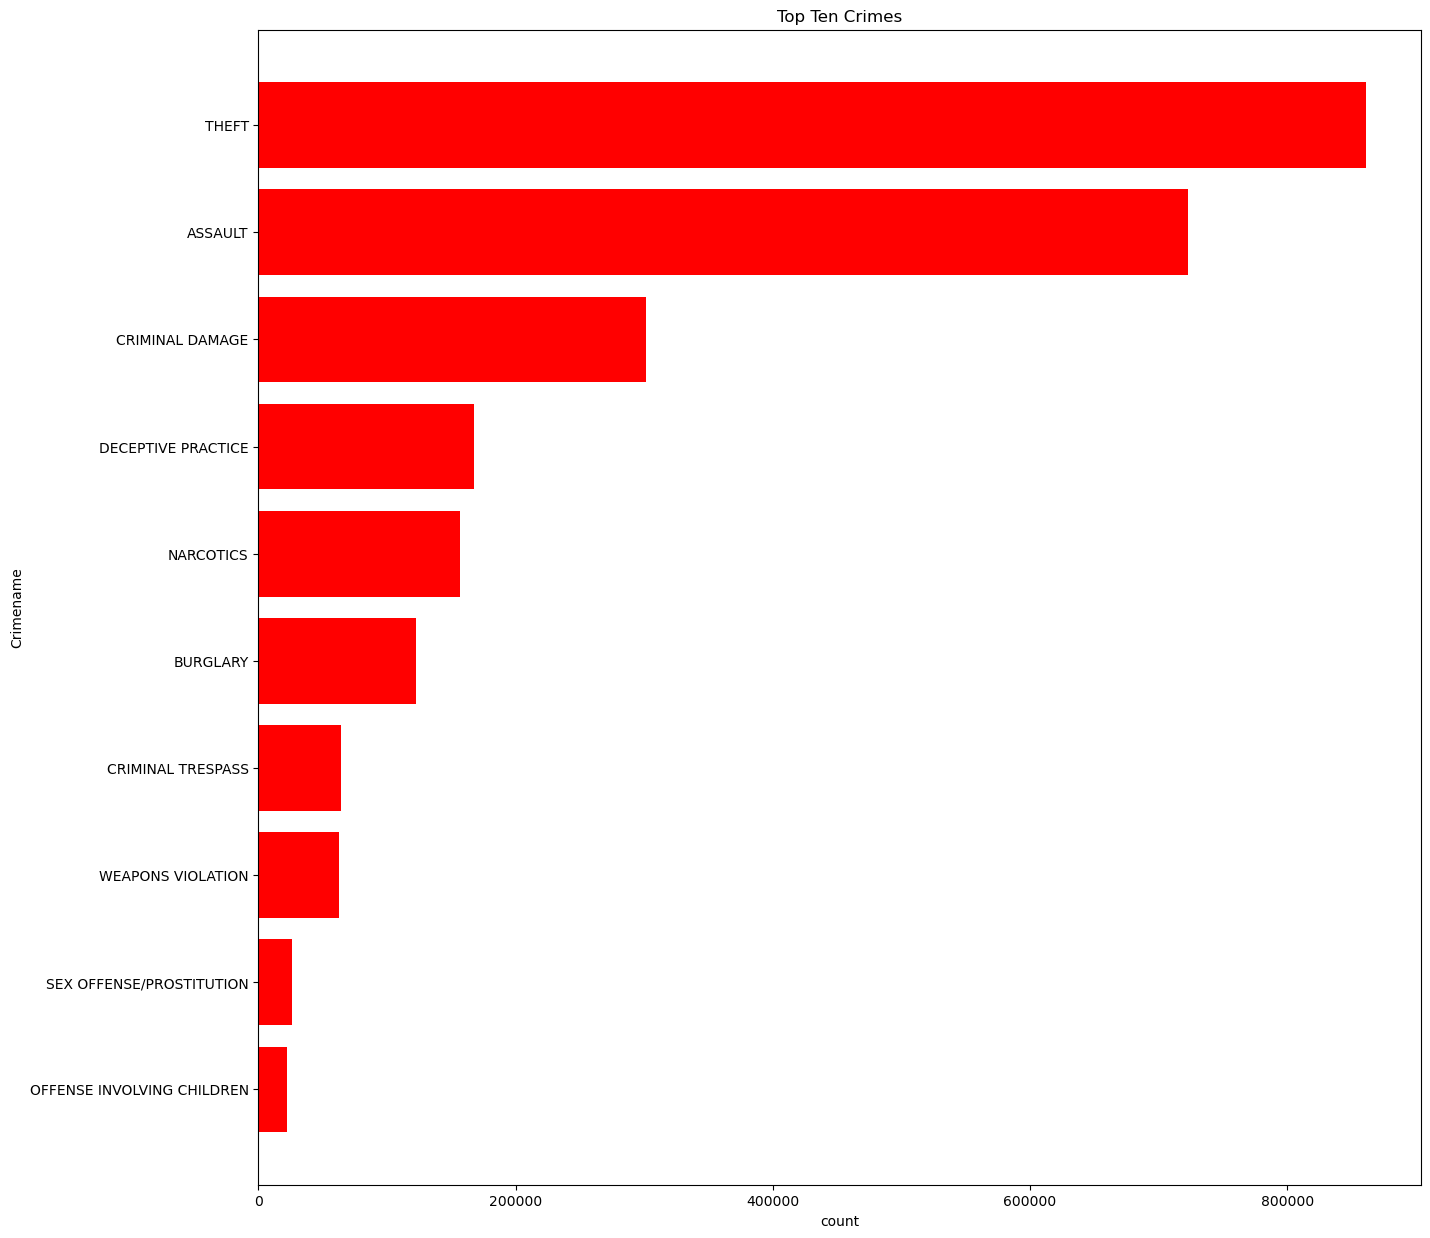

In [78]:
top_crimes = df.nlargest(10, 'count')


plt.figure(figsize=(15, 15))
plt.barh(top_crimes['crimename'], top_crimes['count'], color='red')
plt.xlabel('count')
plt.ylabel('Crimename')
plt.title('Top Ten Crimes')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest count on top
plt.show()

In [ ]:

spark.stop()
